In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df = pd.read_csv('allyears.csv')

In [3]:
df.head()

,Unnamed: 0,yyyymmdd,lat,long,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,...,"lower columbia, hood river",owyhee malheur,"raft, goose, salmon falls, bruneau",snake above palisades,"umatilla, walla walla, willow",upper clark fork river basin,"weiser, payette, boise","white, green, cedar, skykomish, snoqualmi, baker, skagit",willamette,"yakima, ahtanum"
0,0,1990-02-10,48.566667,-115.450000,311,15A08S,Banfield Mountain,5600,17.2,12.2,...,0,0,0,0,0,0,0,0,0,0
1,1,1990-02-10,45.000000,-117.166667,736,17D08S,Schneider Meadows,5400,21.6,22.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1990-02-10,45.083333,-117.550000,812,17D07S,Taylor Green,5740,9.8,15.2,...,0,0,0,0,0,0,0,0,0,0
3,3,1990-02-10,45.066667,-118.150000,873,18D21S,Wolf Creek,5630,8.4,12.6,...,0,0,0,0,0,0,0,0,0,0
4,4,1990-02-10,44.300000,-115.233333,312,15E11S,Banner Summit,7040,15.1,16.8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'])

In [6]:
df.set_index('yyyymmdd', inplace = True)

In [7]:
df.head()

,lat,long,station_id,acton_id,station_name,elevation,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt,...,"lower columbia, hood river",owyhee malheur,"raft, goose, salmon falls, bruneau",snake above palisades,"umatilla, walla walla, willow",upper clark fork river basin,"weiser, payette, boise","white, green, cedar, skykomish, snoqualmi, baker, skagit",willamette,"yakima, ahtanum"
yyyymmdd,,,,,,,,,,,,,,,,,,,,,
1990-02-10,48.566667,-115.450000,311,15A08S,Banfield Mountain,5600,17.2,12.2,141.0,23.8,...,0,0,0,0,0,0,0,0,0,0
1990-02-10,45.000000,-117.166667,736,17D08S,Schneider Meadows,5400,21.6,22.0,98.0,21.3,...,0,0,0,0,0,0,0,0,0,0
1990-02-10,45.083333,-117.550000,812,17D07S,Taylor Green,5740,9.8,15.2,64.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1990-02-10,45.066667,-118.150000,873,18D21S,Wolf Creek,5630,8.4,12.6,67.0,10.2,...,0,0,0,0,0,0,0,0,0,0
1990-02-10,44.300000,-115.233333,312,15E11S,Banner Summit,7040,15.1,16.8,90.0,18.4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.sort_index(inplace = True)

In [13]:
df.acton_id.value_counts()

14C05S    96
14F04S    96
13C01S    96
15E04S    64
14A11S    64
          ..
16H04S    12
14A19S    10
23D03S    10
21B31S    10
14B04S    10
Name: acton_id, Length: 227, dtype: int64

In [14]:
df.index.value_counts()

1998-02-10    279
1993-02-10    279
1999-02-10    279
1994-02-10    279
1995-02-10    279
1990-02-10    279
1996-02-10    279
1991-02-10    279
1992-02-10    279
1997-02-10    279
2008-02-10    274
2019-02-10    274
2004-02-10    274
2000-02-10    274
2017-02-10    274
2013-02-10    274
2014-02-10    274
2009-02-10    274
2020-02-10    274
2015-02-10    274
2010-02-10    274
2005-02-10    274
2016-02-10    274
2011-02-10    274
2006-02-10    274
2001-02-10    274
2012-02-10    274
2007-02-10    274
2002-02-10    274
2003-02-10    274
2018-02-10    272
2021-02-10    270
Name: yyyymmdd, dtype: int64

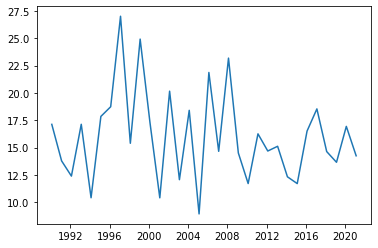

In [16]:
plt.plot(df.groupby(df.index)['wteq_amt'].mean())

In [19]:
X = df.drop(columns = ['wteq_amt', 'station_name', 'acton_id']).values

In [20]:
y = df['wteq_amt'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [23]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [24]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=279, batch_size=64)

In [25]:
batch_x, batch_y = train_sequences[0]

In [26]:
batch_x.shape

(64, 279, 32)

In [27]:
batch_y.shape

(64,)

In [28]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=279, batch_size=64)

In [29]:
train_sequences[0][0].shape

(64, 279, 32)

In [30]:
input_shape = train_sequences[0][0][0].shape

In [34]:
model = Sequential()
model.add(GRU(64, input_shape=input_shape, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(GRU(64, return_sequences=False))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation=None))

In [35]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_sequences, validation_data=test_sequences, epochs=10, verbose=1)

Epoch 1/10
99/99 [==============================] - 44s 393ms/step - loss: 259.0338 - val_loss: 97.2828
Epoch 2/10
99/99 [==============================] - 38s 380ms/step - loss: 105.7012 - val_loss: 75.6773
Epoch 3/10
99/99 [==============================] - 38s 388ms/step - loss: 100.8120 - val_loss: 71.6084
Epoch 4/10
99/99 [==============================] - 38s 387ms/step - loss: 83.2854 - val_loss: 72.9731
Epoch 5/10
99/99 [==============================] - 38s 387ms/step - loss: 80.8722 - val_loss: 67.4913
Epoch 6/10
99/99 [==============================] - 38s 387ms/step - loss: 81.7138 - val_loss: 66.8099
Epoch 7/10
99/99 [==============================] - 38s 388ms/step - loss: 84.6365 - val_loss: 65.5166
Epoch 8/10
99/99 [==============================] - 38s 383ms/step - loss: 72.6916 - val_loss: 62.6179
Epoch 9/10
99/99 [==============================] - 38s 388ms/step - loss: 75.9759 - val_loss: 62.2624
Epoch 10/10
99/99 [==============================] - 38s 387ms/step - 

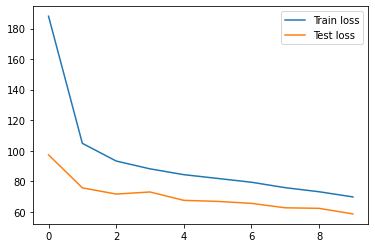

In [38]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();